In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from qsense.io import IO

In [2]:
io = IO(folder=r"2022-12-08_qfi-batch-optimization_4bCE")

In [4]:
df = io.load_dataframe(filename="qfi-batch")
df

08/12/2022, 18:05:37 | Loaded from C:\Users\benma\OneDrive - University of Waterloo\Backups\Desktop (BACKUP)\1 - Projects\Quantum Intelligence Lab\qsense\data\2022-12-08_qfi-batch-optimization_4bCE\qfi-batch.pkl successfully.


array([2, 4], dtype=int64)

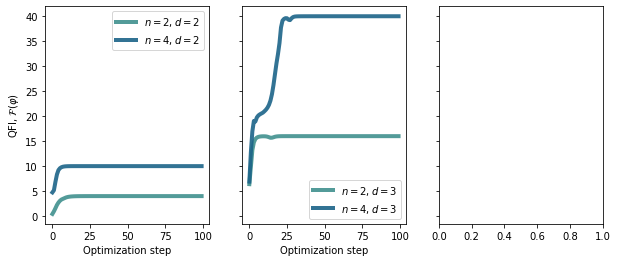

In [17]:
fig, axs = plt.subplots(1, 3, figsize=[10, 4], sharey=True)
colors = sns.color_palette("crest")
for (i, d) in enumerate(df.d.unique()):
    for n in df.n.unique():
        dfi = df[(df.d == d) & (df.n == n)]
        # print(d, n, dfi)
        axs[i].plot(dfi.iloc[0].losses, label=f"$n={n}, d={d}$", **dict(color=colors[n], ls='-', lw=4, alpha=0.9, ))
    axs[i].legend()
    axs[i].set(xlabel="Optimization step")
    axs[0].set(ylabel=r'QFI, $\mathcal{F}(\varphi)$')
plt.show()